# DQN Training Results Visualization

This notebook visualizes the training results and observations from the DQN agent evaluation on the building HVAC control task.

## Section 1: Load and Explore Data

Load progress.csv, rewards.csv, and observations.csv files. Display basic information about each dataset including shape, columns, and first few rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Define paths
base_path = Path("./outputs/2025-11-04_11-47-51/DQN_Train-res1")
progress_file = base_path / "progress.csv"
monitor_folder = base_path / "episode-100" / "monitor"

# Load data
progress_df = pd.read_csv(progress_file)
observations_df = pd.read_csv(monitor_folder / "observations.csv")
rewards_df = pd.read_csv(monitor_folder / "rewards.csv")
agent_actions_df = pd.read_csv(monitor_folder / "agent_actions.csv")
infos_df = pd.read_csv(monitor_folder / "infos.csv")

# Clean infos_df - remove empty rows and NaN values
infos_df = infos_df.dropna()

print("=" * 80)
print("DATA LOADING SUMMARY")
print("=" * 80)
print(f"\n1. Progress Data Shape: {progress_df.shape}")
print(f"   Columns: {list(progress_df.columns)}")
print(f"\n   First 3 episodes:")
print(progress_df.head(3))

print(f"\n2. Observations Data Shape: {observations_df.shape}")
print(f"   Columns: {list(observations_df.columns)}")
print(f"\n   First 3 timesteps:")
print(observations_df.head(3))

print(f"\n3. Rewards Data Shape: {rewards_df.shape}")
print(f"   First 10 rewards:")
print(rewards_df.head(10).to_string())

print(f"\n4. Agent Actions Data Shape: {agent_actions_df.shape}")
print(f"   Columns: {list(agent_actions_df.columns)}")
print(f"\n   First 3 actions:")
print(agent_actions_df.head(3))

print(f"\n5. Infos Data Shape: {infos_df.shape}")
print(f"   Columns: {list(infos_df.columns)}")
print(f"\n   First 5 rows:")
print(infos_df.head())
print(f"\n   Info Summary Statistics:")
print(infos_df.describe())

DATA LOADING SUMMARY

1. Progress Data Shape: (100, 21)
   Columns: ['episode_num', 'mean_reward', 'std_reward', 'mean_reward_comfort_term', 'std_reward_comfort_term', 'mean_reward_energy_term', 'std_reward_energy_term', 'mean_comfort_penalty', 'std_comfort_penalty', 'mean_energy_penalty', 'std_energy_penalty', 'mean_temperature_violation', 'std_temperature_violation', 'mean_power_demand', 'std_power_demand', 'cumulative_power_demand', 'comfort_violation_time(%)', 'length(timesteps)', 'time_elapsed(hours)', 'terminated', 'truncated']

   First 3 episodes:
   episode_num  mean_reward  std_reward  mean_reward_comfort_term  \
0            1    -0.399965    0.436695                 -0.309113   
1            2    -0.371036    0.414832                 -0.276041   
2            3    -0.341194    0.397023                 -0.239342   

   std_reward_comfort_term  mean_reward_energy_term  std_reward_energy_term  \
0                 0.433992                -0.090852                0.161153   
1  

## Section 2: Plot Training Progress Metrics

Create line plots showing mean_reward, mean_comfort_penalty, mean_energy_penalty, and mean_power_demand across episodes. Include error bands using std values.

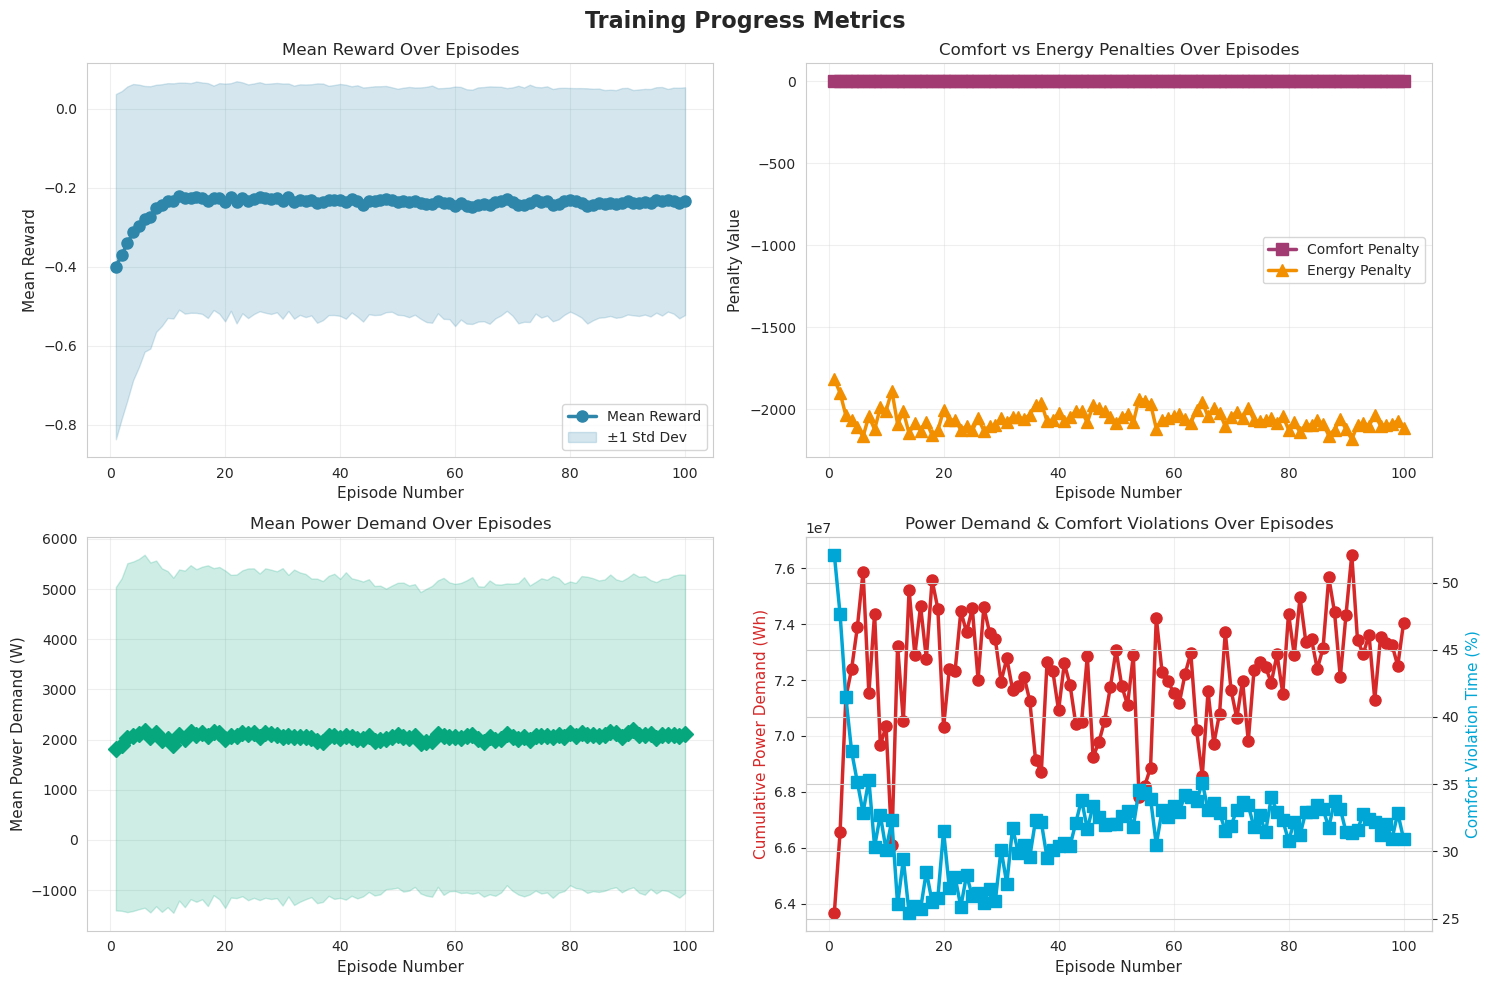


✓ Training progress metrics plot created!


In [2]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Training Progress Metrics', fontsize=16, fontweight='bold')

# Plot 1: Mean Reward with error band
ax = axes[0, 0]
ax.plot(progress_df['episode_num'], progress_df['mean_reward'], marker='o', 
        linewidth=2.5, markersize=8, color='#2E86AB', label='Mean Reward')
ax.fill_between(progress_df['episode_num'], 
                progress_df['mean_reward'] - progress_df['std_reward'],
                progress_df['mean_reward'] + progress_df['std_reward'],
                alpha=0.2, color='#2E86AB', label='±1 Std Dev')
ax.set_xlabel('Episode Number', fontsize=11)
ax.set_ylabel('Mean Reward', fontsize=11)
ax.set_title('Mean Reward Over Episodes', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Plot 2: Comfort and Energy Penalties
ax = axes[0, 1]
ax.plot(progress_df['episode_num'], progress_df['mean_comfort_penalty'], 
        marker='s', linewidth=2.5, markersize=8, label='Comfort Penalty', color='#A23B72')
ax.plot(progress_df['episode_num'], progress_df['mean_energy_penalty'], 
        marker='^', linewidth=2.5, markersize=8, label='Energy Penalty', color='#F18F01')
ax.set_xlabel('Episode Number', fontsize=11)
ax.set_ylabel('Penalty Value', fontsize=11)
ax.set_title('Comfort vs Energy Penalties Over Episodes', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Plot 3: Mean Power Demand
ax = axes[1, 0]
ax.plot(progress_df['episode_num'], progress_df['mean_power_demand'], 
        marker='D', linewidth=2.5, markersize=8, color='#06A77D')
ax.fill_between(progress_df['episode_num'],
                progress_df['mean_power_demand'] - progress_df['std_power_demand'],
                progress_df['mean_power_demand'] + progress_df['std_power_demand'],
                alpha=0.2, color='#06A77D')
ax.set_xlabel('Episode Number', fontsize=11)
ax.set_ylabel('Mean Power Demand (W)', fontsize=11)
ax.set_title('Mean Power Demand Over Episodes', fontsize=12)
ax.grid(True, alpha=0.3)

# Plot 4: Cumulative Power and Comfort Violations
ax1 = axes[1, 1]
color1 = '#D62828'
ax1.plot(progress_df['episode_num'], progress_df['cumulative_power_demand'], 
         marker='o', linewidth=2.5, markersize=8, color=color1, label='Cumulative Power Demand')
ax1.set_xlabel('Episode Number', fontsize=11)
ax1.set_ylabel('Cumulative Power Demand (Wh)', fontsize=11, color=color1)

ax2 = ax1.twinx()
color2 = '#00A6D6'
ax2.plot(progress_df['episode_num'], progress_df['comfort_violation_time(%)'], 
         marker='s', linewidth=2.5, markersize=8, color=color2, label='Comfort Violation Time')
ax2.set_ylabel('Comfort Violation Time (%)', fontsize=11, color=color2)

ax1.set_title('Power Demand & Comfort Violations Over Episodes', fontsize=12)
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Training progress metrics plot created!")

## Section 3: Visualize Episode Rewards

Plot the rewards.csv data as a time series showing reward values for each timestep in the episode. Add moving average line to identify trends.

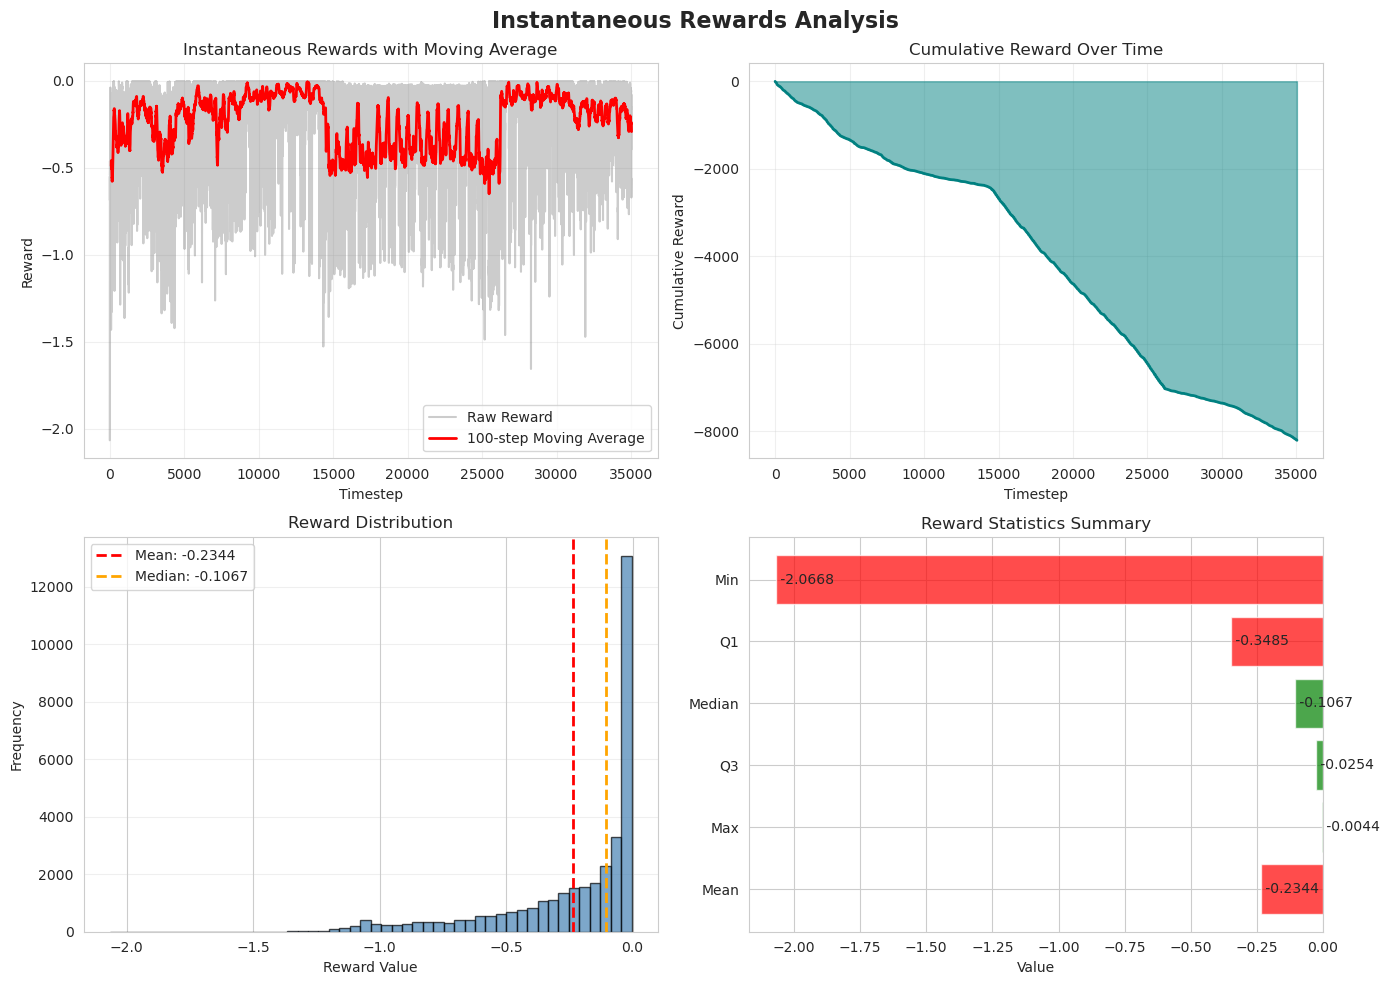


✓ Episode 3 rewards analysis plot created!

REWARDS ANALYSIS STATISTICS

Total Episode Reward: -8211.6964
Average Step Reward: -0.234386
Reward Std Dev: 0.288036
Reward Range: [-2.066832, -0.004352]
Timesteps: 35035


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create rewards analysis figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Instantaneous Rewards Analysis', fontsize=16, fontweight='bold')

# 1. Instantaneous rewards with moving average
ax = axes[0, 0]
window = 100
reward_ma = rewards_df['reward'].rolling(window=window).mean()
ax.plot(rewards_df['reward'], alpha=0.4, label='Raw Reward', color='gray')
ax.plot(reward_ma, label=f'{window}-step Moving Average', color='red', linewidth=2)
ax.set_xlabel('Timestep')
ax.set_ylabel('Reward')
ax.set_title('Instantaneous Rewards with Moving Average')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Cumulative reward over time
ax = axes[0, 1]
cumulative_reward = rewards_df['reward'].cumsum()
ax.fill_between(range(len(cumulative_reward)), cumulative_reward, alpha=0.5, color='teal')
ax.plot(cumulative_reward, color='teal', linewidth=2)
ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative Reward')
ax.set_title('Cumulative Reward Over Time')
ax.grid(True, alpha=0.3)

# 3. Reward distribution
ax = axes[1, 0]
ax.hist(rewards_df['reward'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
mean_reward = rewards_df['reward'].mean()
median_reward = rewards_df['reward'].median()
ax.axvline(mean_reward, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_reward:.4f}')
ax.axvline(median_reward, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_reward:.4f}')
ax.set_xlabel('Reward Value')
ax.set_ylabel('Frequency')
ax.set_title('Reward Distribution')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 4. Reward statistics summary box
ax = axes[1, 1]

stats_text = [
    ('Mean', f"{rewards_df['reward'].mean():.4f}"),
    ('Max', f"{rewards_df['reward'].max():.4f}"),
    ('Q3', f"{rewards_df['reward'].quantile(0.75):.4f}"),
    ('Median', f"{rewards_df['reward'].median():.4f}"),
    ('Q1', f"{rewards_df['reward'].quantile(0.25):.4f}"),
    ('Min', f"{rewards_df['reward'].min():.4f}"),
]

# Create bar chart for statistics
y_pos = np.arange(len(stats_text))
values = [float(v[1]) for v in stats_text]
colors = ['green' if v > rewards_df['reward'].mean() else 'red' for v in values]

bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels([s[0] for s in stats_text])
ax.set_xlabel('Value')
ax.set_title('Reward Statistics Summary')

# Add value labels on bars
for i, (bar, v) in enumerate(zip(bars, values)):
    ax.text(v, i, f' {v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n✓ Episode 3 rewards analysis plot created!")

# Print reward statistics
print("\n" + "="*60)
print("REWARDS ANALYSIS STATISTICS")
print("="*60)
print(f"\nTotal Episode Reward: {cumulative_reward.iloc[-1]:.4f}")
print(f"Average Step Reward: {rewards_df['reward'].mean():.6f}")
print(f"Reward Std Dev: {rewards_df['reward'].std():.6f}")
print(f"Reward Range: [{rewards_df['reward'].min():.6f}, {rewards_df['reward'].max():.6f}]")
print(f"Timesteps: {len(rewards_df)}")


## Section 3.5: Analyze Reward Components from Infos

Visualize the energy and comfort components of the reward signal, including individual penalties and their contribution to the total reward.

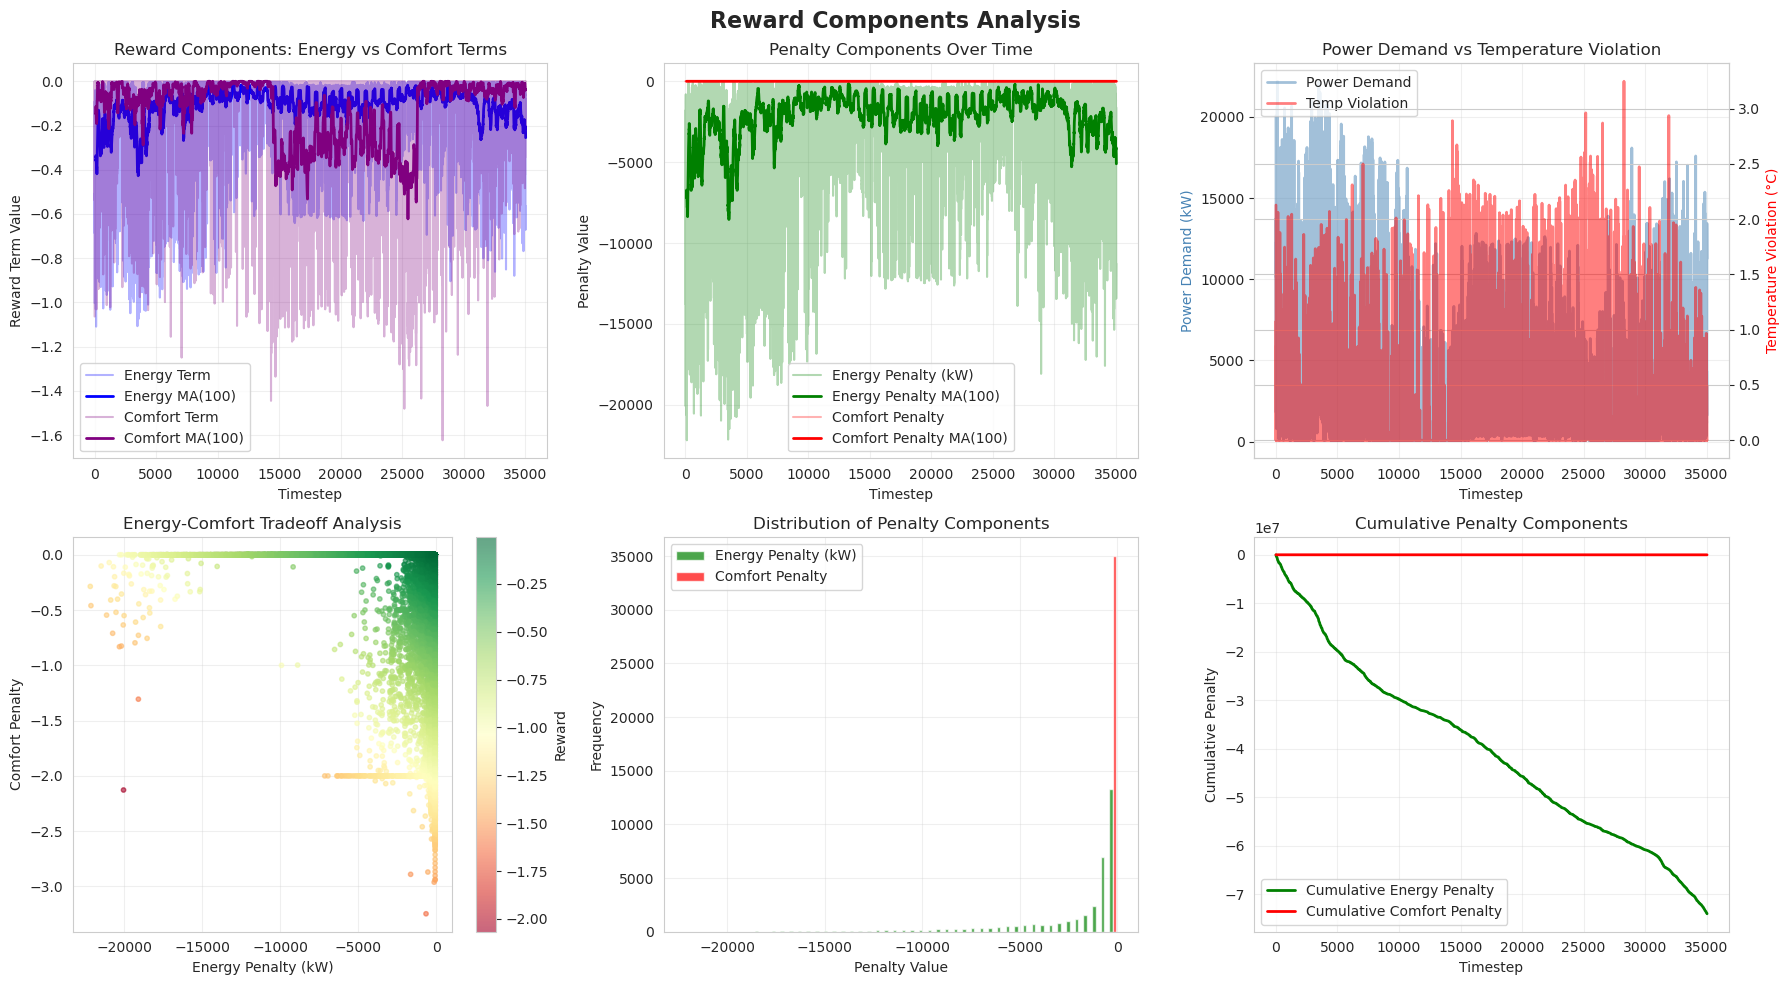


✓ Episode 3 infos analysis plot created!

REWARD COMPONENT ANALYSIS (from infos.csv)

📊 Energy Term Statistics:
  Mean: -0.105664
  Std:  0.158616
  Min:  -1.109656
  Max:  -0.004352

📊 Comfort Term Statistics:
  Mean: -0.128721
  Std:  0.276566
  Min:  -1.623531
  Max:  0.000000

📊 Energy Penalty Statistics:
  Mean: -2113.2851 kW
  Total: -74038942.06 kW
  Max:  -87.0362 kW

📊 Comfort Penalty Statistics:
  Mean: -0.2574
  Total: -9019.50
  Max:  0.0000

📊 Temperature Violation Statistics:
  Mean: 0.2574 °C
  Total Violations: 10839 timesteps
  Max Violation: 3.2471 °C


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create infos analysis figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Reward Components Analysis', fontsize=16, fontweight='bold')

# 1. Energy and Comfort terms over time
ax = axes[0, 0]
window = 100
energy_ma = infos_df['energy_term'].rolling(window=window).mean()
comfort_ma = infos_df['comfort_term'].rolling(window=window).mean()

ax.plot(infos_df['energy_term'], alpha=0.3, label='Energy Term', color='blue')
ax.plot(energy_ma, label=f'Energy MA({window})', color='blue', linewidth=2)
ax.plot(infos_df['comfort_term'], alpha=0.3, label='Comfort Term', color='purple')
ax.plot(comfort_ma, label=f'Comfort MA({window})', color='purple', linewidth=2)
ax.set_xlabel('Timestep')
ax.set_ylabel('Reward Term Value')
ax.set_title('Reward Components: Energy vs Comfort Terms')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Penalty components over time
ax = axes[0, 1]
energy_ma = infos_df['energy_penalty'].rolling(window=window).mean()
comfort_ma = infos_df['comfort_penalty'].rolling(window=window).mean()

ax.plot(infos_df['energy_penalty'], alpha=0.3, label='Energy Penalty (kW)', color='green')
ax.plot(energy_ma, label=f'Energy Penalty MA({window})', color='green', linewidth=2)
ax.plot(infos_df['comfort_penalty'], alpha=0.3, label='Comfort Penalty', color='red')
ax.plot(comfort_ma, label=f'Comfort Penalty MA({window})', color='red', linewidth=2)
ax.set_xlabel('Timestep')
ax.set_ylabel('Penalty Value')
ax.set_title('Penalty Components Over Time')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Power demand vs Temperature violation (dual axis)
ax = axes[0, 2]
ax2 = ax.twinx()
ax.plot(infos_df['total_power_demand'], color='steelblue', alpha=0.5, linewidth=2, label='Power Demand')
ax2.plot(infos_df['total_temperature_violation'], color='red', alpha=0.5, linewidth=2, label='Temp Violation')
ax.set_xlabel('Timestep')
ax.set_ylabel('Power Demand (kW)', color='steelblue')
ax2.set_ylabel('Temperature Violation (°C)', color='red')
ax.set_title('Power Demand vs Temperature Violation')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax.grid(True, alpha=0.3)

# 4. Energy-Comfort tradeoff scatter plot
ax = axes[1, 0]
scatter = ax.scatter(infos_df['energy_penalty'], infos_df['comfort_penalty'], 
                     c=rewards_df['reward'], cmap='RdYlGn', alpha=0.6, s=10)
ax.set_xlabel('Energy Penalty (kW)')
ax.set_ylabel('Comfort Penalty')
ax.set_title('Energy-Comfort Tradeoff Analysis')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Reward')
ax.grid(True, alpha=0.3)

# 5. Distribution of penalty components
ax = axes[1, 1]
ax.hist([infos_df['energy_penalty'], infos_df['comfort_penalty']], 
        bins=50, label=['Energy Penalty (kW)', 'Comfort Penalty'], 
        color=['green', 'red'], alpha=0.7)
ax.set_xlabel('Penalty Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Penalty Components')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Cumulative penalty accumulation
ax = axes[1, 2]
ax.plot(infos_df['energy_penalty'].cumsum(), label='Cumulative Energy Penalty', linewidth=2, color='green')
ax.plot(infos_df['comfort_penalty'].cumsum(), label='Cumulative Comfort Penalty', linewidth=2, color='red')
ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative Penalty')
ax.set_title('Cumulative Penalty Components')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Episode 3 infos analysis plot created!")

# Print detailed statistics
print("\n" + "="*60)
print("REWARD COMPONENT ANALYSIS (from infos.csv)")
print("="*60)

print("\n📊 Energy Term Statistics:")
print(f"  Mean: {infos_df['energy_term'].mean():.6f}")
print(f"  Std:  {infos_df['energy_term'].std():.6f}")
print(f"  Min:  {infos_df['energy_term'].min():.6f}")
print(f"  Max:  {infos_df['energy_term'].max():.6f}")

print("\n📊 Comfort Term Statistics:")
print(f"  Mean: {infos_df['comfort_term'].mean():.6f}")
print(f"  Std:  {infos_df['comfort_term'].std():.6f}")
print(f"  Min:  {infos_df['comfort_term'].min():.6f}")
print(f"  Max:  {infos_df['comfort_term'].max():.6f}")

print("\n📊 Energy Penalty Statistics:")
print(f"  Mean: {infos_df['energy_penalty'].mean():.4f} kW")
print(f"  Total: {infos_df['energy_penalty'].sum():.2f} kW")
print(f"  Max:  {infos_df['energy_penalty'].max():.4f} kW")

print("\n📊 Comfort Penalty Statistics:")
print(f"  Mean: {infos_df['comfort_penalty'].mean():.4f}")
print(f"  Total: {infos_df['comfort_penalty'].sum():.2f}")
print(f"  Max:  {infos_df['comfort_penalty'].max():.4f}")

print("\n📊 Temperature Violation Statistics:")
print(f"  Mean: {infos_df['total_temperature_violation'].mean():.4f} °C")
print(f"  Total Violations: {(infos_df['total_temperature_violation'] > 0).sum()} timesteps")
print(f"  Max Violation: {infos_df['total_temperature_violation'].max():.4f} °C")


## Section 4: Analyze Observations Over Time

Create subplots showing key observations like outdoor_temperature, air_temperature, air_humidity, and HVAC_electricity_demand_rate over the episode timeline.

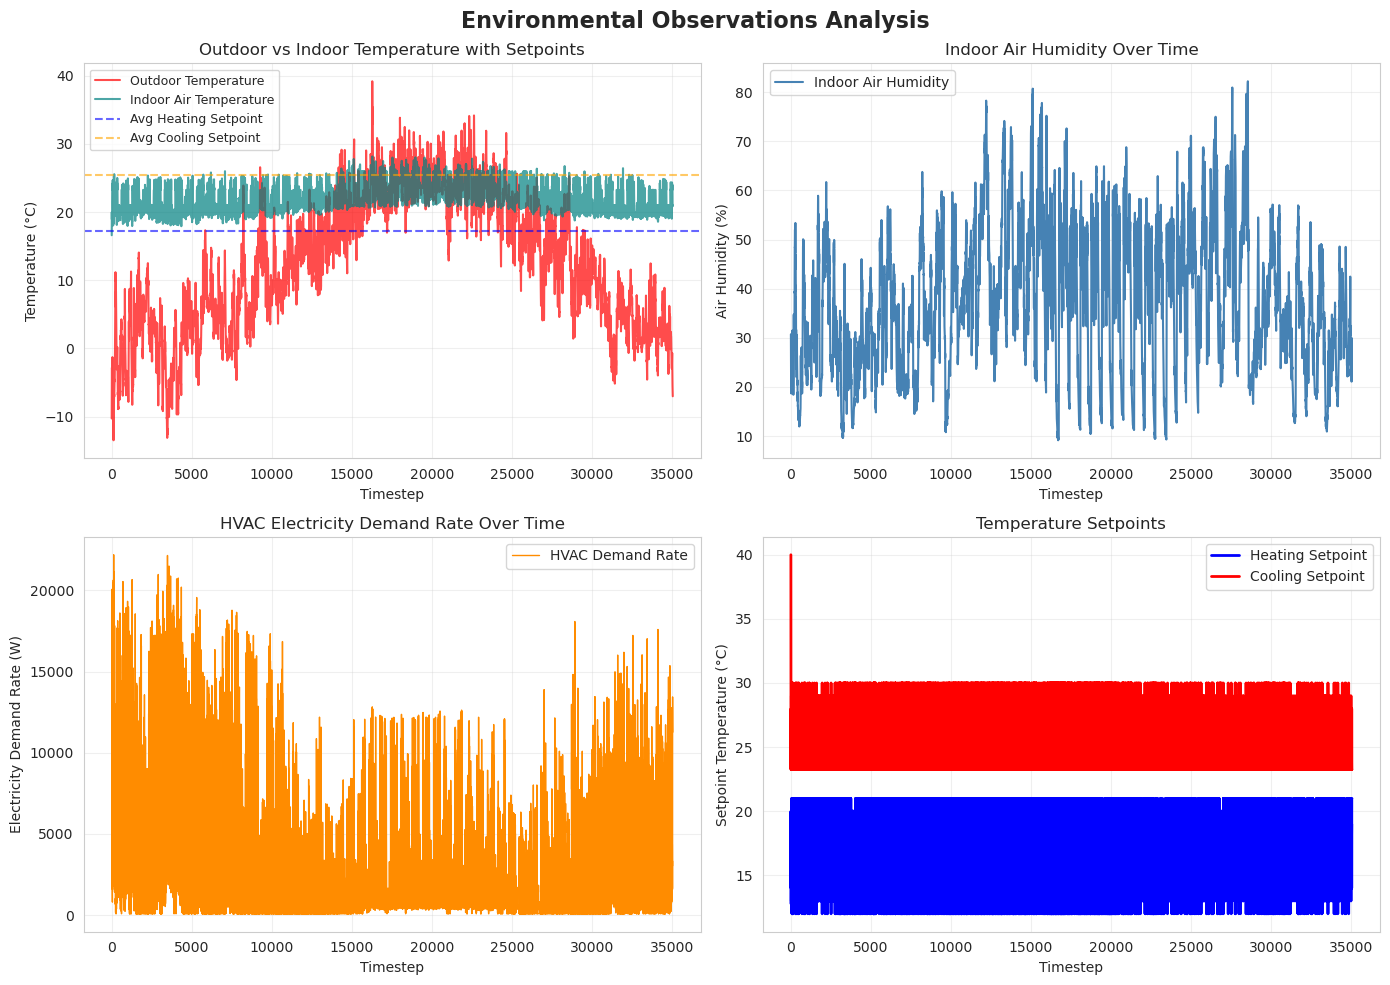


✓ Episode 3 observations analysis plot created!

ENVIRONMENTAL CONDITIONS STATISTICS

🌡️  Outdoor Temperature:
  Mean: 12.51°C
  Range: [-13.47, 39.19]°C

🏠 Indoor Air Temperature:
  Mean: 22.03°C
  Range: [16.61, 28.16]°C

💧 Indoor Air Humidity:
  Mean: 37.58%
  Range: [9.14, 82.24]%

⚡ HVAC Electricity Demand:
  Mean: 2113W
  Peak: 22193W

👥 Occupancy:
  Mean: 5.78 people
  Max: 20 people

🔧 Setpoints:
  Heating Setpoint: 17.23°C
  Cooling Setpoint: 25.43°C


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create observations analysis figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Environmental Observations Analysis', fontsize=16, fontweight='bold')

# 1. Outdoor vs Indoor temperature with setpoints
ax = axes[0, 0]
ax.plot(observations_df['outdoor_temperature'], alpha=0.7, label='Outdoor Temperature', color='red', linewidth=1.5)
ax.plot(observations_df['air_temperature'], alpha=0.7, label='Indoor Air Temperature', color='teal', linewidth=1.5)
ax.axhline(observations_df['htg_setpoint'].mean(), 
           color='blue', linestyle='--', alpha=0.6, label='Avg Heating Setpoint')
ax.axhline(observations_df['clg_setpoint'].mean(), 
           color='orange', linestyle='--', alpha=0.6, label='Avg Cooling Setpoint')
ax.set_xlabel('Timestep')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Outdoor vs Indoor Temperature with Setpoints')
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

# 2. Indoor air humidity over time
ax = axes[0, 1]
ax.plot(observations_df['air_humidity'], color='steelblue', linewidth=1.5, label='Indoor Air Humidity')
ax.set_xlabel('Timestep')
ax.set_ylabel('Air Humidity (%)')
ax.set_title('Indoor Air Humidity Over Time')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. HVAC electricity demand rate
ax = axes[1, 0]
ax.plot(observations_df['HVAC_electricity_demand_rate'], color='darkorange', linewidth=1, label='HVAC Demand Rate')
ax.set_xlabel('Timestep')
ax.set_ylabel('Electricity Demand Rate (W)')
ax.set_title('HVAC Electricity Demand Rate Over Time')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Occupancy and temperature setpoints (dual axis)
ax = axes[1, 1]
ax.plot(observations_df['htg_setpoint'], color='blue', linewidth=2, 
         label='Heating Setpoint', linestyle='-')
ax.plot(observations_df['clg_setpoint'], color='red', linewidth=2, 
         label='Cooling Setpoint', linestyle='-')
ax.set_xlabel('Timestep')
ax.set_ylabel('Setpoint Temperature (°C)')
ax.set_title('Temperature Setpoints')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Episode 3 observations analysis plot created!")

# Print environmental statistics
print("\n" + "="*60)
print("ENVIRONMENTAL CONDITIONS STATISTICS")
print("="*60)

print("\n🌡️  Outdoor Temperature:")
print(f"  Mean: {observations_df['outdoor_temperature'].mean():.2f}°C")
print(f"  Range: [{observations_df['outdoor_temperature'].min():.2f}, {observations_df['outdoor_temperature'].max():.2f}]°C")

print("\n🏠 Indoor Air Temperature:")
print(f"  Mean: {observations_df['air_temperature'].mean():.2f}°C")
print(f"  Range: [{observations_df['air_temperature'].min():.2f}, {observations_df['air_temperature'].max():.2f}]°C")

print("\n💧 Indoor Air Humidity:")
print(f"  Mean: {observations_df['air_humidity'].mean():.2f}%")
print(f"  Range: [{observations_df['air_humidity'].min():.2f}, {observations_df['air_humidity'].max():.2f}]%")

print("\n⚡ HVAC Electricity Demand:")
print(f"  Mean: {observations_df['HVAC_electricity_demand_rate'].mean():.0f}W")
print(f"  Peak: {observations_df['HVAC_electricity_demand_rate'].max():.0f}W")

print("\n👥 Occupancy:")
print(f"  Mean: {observations_df['people_occupant'].mean():.2f} people")
print(f"  Max: {observations_df['people_occupant'].max():.0f} people")

print("\n🔧 Setpoints:")
print(f"  Heating Setpoint: {observations_df['htg_setpoint'].mean():.2f}°C")
print(f"  Cooling Setpoint: {observations_df['clg_setpoint'].mean():.2f}°C")


## Section 5: Compare Energy and Comfort Metrics

Generate scatter plots and bar charts comparing energy consumption vs comfort violations. Create heatmaps showing relationships between setpoints and temperature violations.

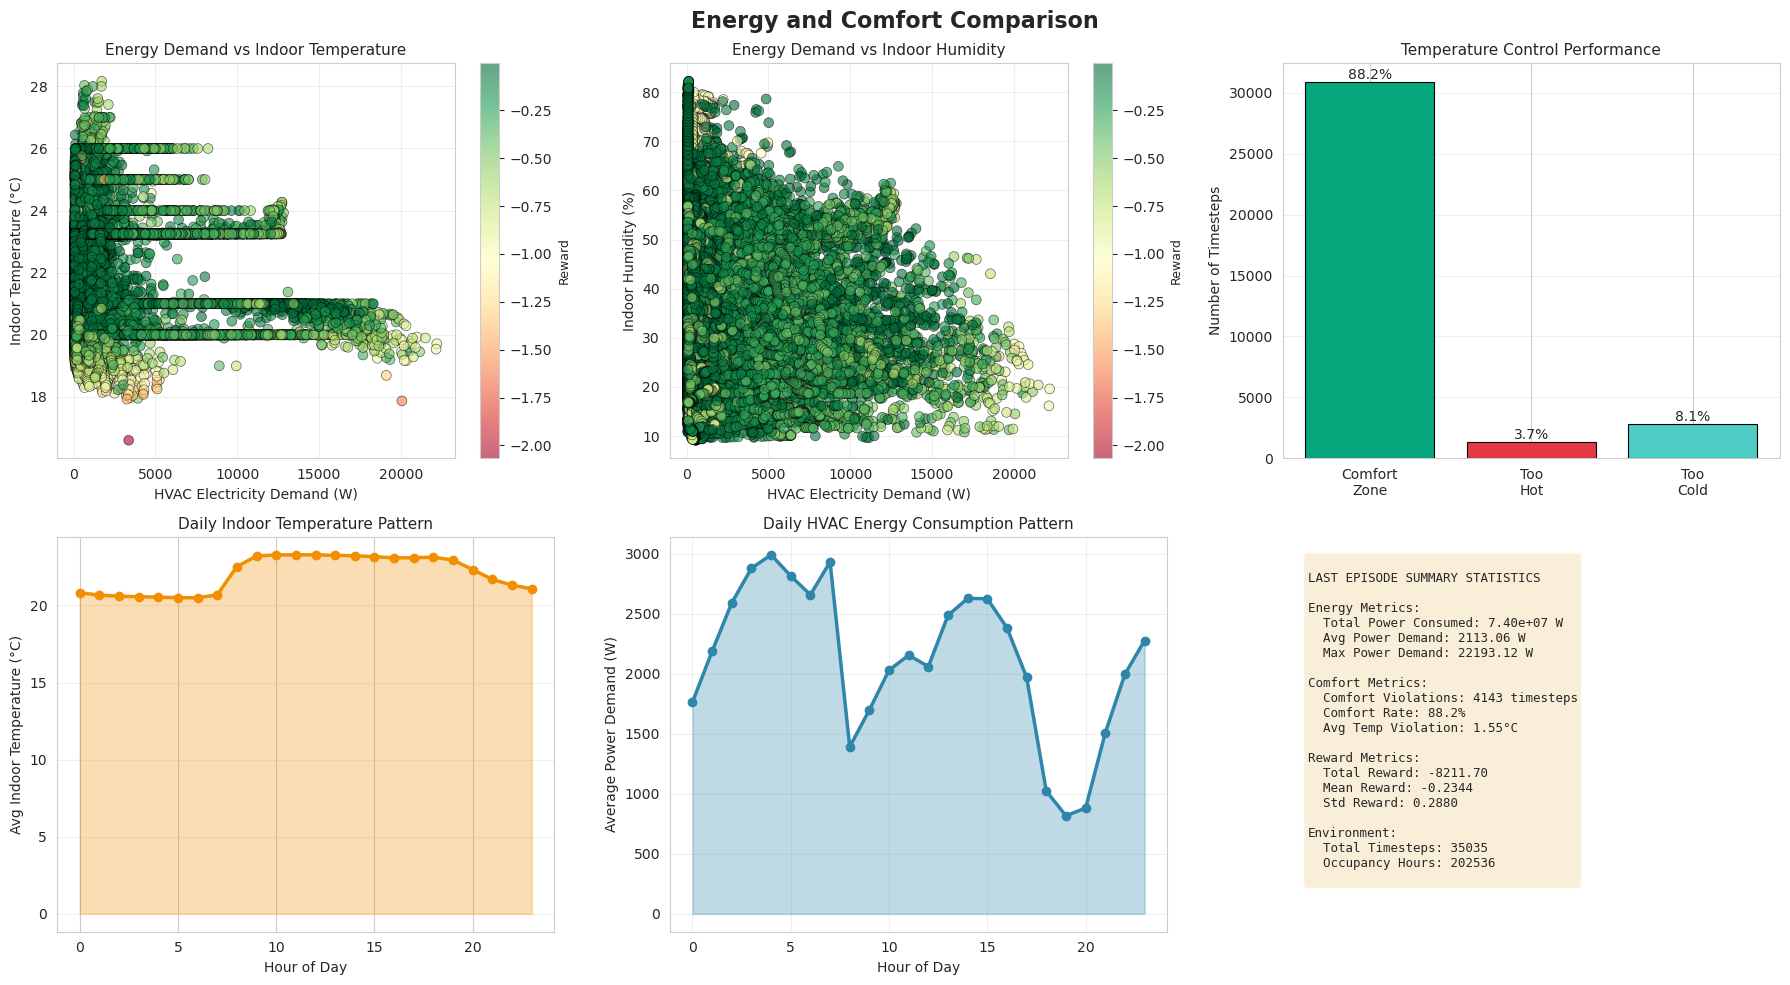


✓ Energy and comfort comparison plots created!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure dataframes have matching lengths - use the minimum length
min_len = min(len(observations_df), len(rewards_df))
obs_data = observations_df.iloc[:min_len].reset_index(drop=True)
reward_data = rewards_df.iloc[:min_len].reset_index(drop=True)

# Create observations analysis figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Energy and Comfort Comparison', fontsize=16, fontweight='bold')

# Plot 1: Energy vs Temperature
ax1 = axes[0, 0]
scatter = ax1.scatter(obs_data['HVAC_electricity_demand_rate'], obs_data['air_temperature'], 
                      c=reward_data['reward'], cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('HVAC Electricity Demand (W)', fontsize=10)
ax1.set_ylabel('Indoor Temperature (°C)', fontsize=10)
ax1.set_title('Energy Demand vs Indoor Temperature', fontsize=11)
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Reward', fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Energy vs Humidity
ax2 = axes[0, 1]
scatter = ax2.scatter(obs_data['HVAC_electricity_demand_rate'], obs_data['air_humidity'],
                      c=reward_data['reward'], cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('HVAC Electricity Demand (W)', fontsize=10)
ax2.set_ylabel('Indoor Humidity (%)', fontsize=10)
ax2.set_title('Energy Demand vs Indoor Humidity', fontsize=11)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Reward', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Temperature Control Performance
ax3 = axes[0, 2]
hot_zone = obs_data['air_temperature'] > obs_data['clg_setpoint']
cold_zone = obs_data['air_temperature'] < obs_data['htg_setpoint']
comfort_zone = ~(hot_zone | cold_zone)
ax3.bar(['Comfort\nZone', 'Too\nHot', 'Too\nCold'], 
        [comfort_zone.sum(), hot_zone.sum(), cold_zone.sum()],
        color=['#06A77D', '#E63946', '#4ECDC4'], edgecolor='black', linewidth=0.8)
ax3.set_ylabel('Number of Timesteps', fontsize=10)
ax3.set_title('Temperature Control Performance', fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')
for i, v in enumerate([comfort_zone.sum(), hot_zone.sum(), cold_zone.sum()]):
    ax3.text(i, v, f'{100*v/len(obs_data):.1f}%', ha='center', va='bottom')

# Plot 4: Heatmap - Hour vs Temperature Violation
ax4 = axes[1, 0]
hour_data = obs_data.groupby('hour').apply(lambda x: np.abs(x['air_temperature']).mean())
ax4.plot(hour_data.index, hour_data.values, marker='o', linewidth=2.5,
         markersize=6, color='#F18F01', label='Avg Indoor Temp')
ax4.fill_between(hour_data.index, hour_data.values, alpha=0.3, color='#F18F01')
ax4.set_xlabel('Hour of Day', fontsize=10)
ax4.set_ylabel('Avg Indoor Temperature (°C)', fontsize=10)
ax4.set_title('Daily Indoor Temperature Pattern', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# Plot 5: Daily Energy Consumption Pattern
ax5 = axes[1, 1]
hour_energy = obs_data.groupby('hour')['HVAC_electricity_demand_rate'].mean()
ax5.plot(hour_energy.index, hour_energy.values, marker='o', linewidth=2.5, 
         markersize=6, color='#2E86AB', label='Avg Energy Demand')
ax5.fill_between(hour_energy.index, hour_energy.values, alpha=0.3, color='#2E86AB')
ax5.set_xlabel('Hour of Day', fontsize=10)
ax5.set_ylabel('Average Power Demand (W)', fontsize=10)
ax5.set_title('Daily HVAC Energy Consumption Pattern', fontsize=11)
ax5.grid(True, alpha=0.3)

# Plot 6: Episode Performance Summary
ax6 = axes[1, 2]
ax6.axis('off')

episode_stats = f"""
LAST EPISODE SUMMARY STATISTICS

Energy Metrics:
  Total Power Consumed: {obs_data['HVAC_electricity_demand_rate'].sum():.2e} W
  Avg Power Demand: {obs_data['HVAC_electricity_demand_rate'].mean():.2f} W
  Max Power Demand: {obs_data['HVAC_electricity_demand_rate'].max():.2f} W
  
Comfort Metrics:
  Comfort Violations: {(hot_zone | cold_zone).sum()} timesteps
  Comfort Rate: {100*comfort_zone.sum()/len(obs_data):.1f}%
  Avg Temp Violation: {np.abs(obs_data['air_temperature'] - (obs_data['htg_setpoint'] + obs_data['clg_setpoint'])/2).mean():.2f}°C
  
Reward Metrics:
  Total Reward: {reward_data['reward'].sum():.2f}
  Mean Reward: {reward_data['reward'].mean():.4f}
  Std Reward: {reward_data['reward'].std():.4f}
  
Environment:
  Total Timesteps: {len(obs_data)}
  Occupancy Hours: {obs_data['people_occupant'].sum():.0f}
"""

ax6.text(0.05, 0.95, episode_stats, transform=ax6.transAxes, fontsize=9,
        verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✓ Energy and comfort comparison plots created!")

## Section 6: Aligned Step-by-Step Dynamics (State → Action → Penalties)

This visualization links the agent's state, actions, and immediate consequences on the same time axis. This is the single best tool for understanding the agent's policy and how it responds to environmental changes.

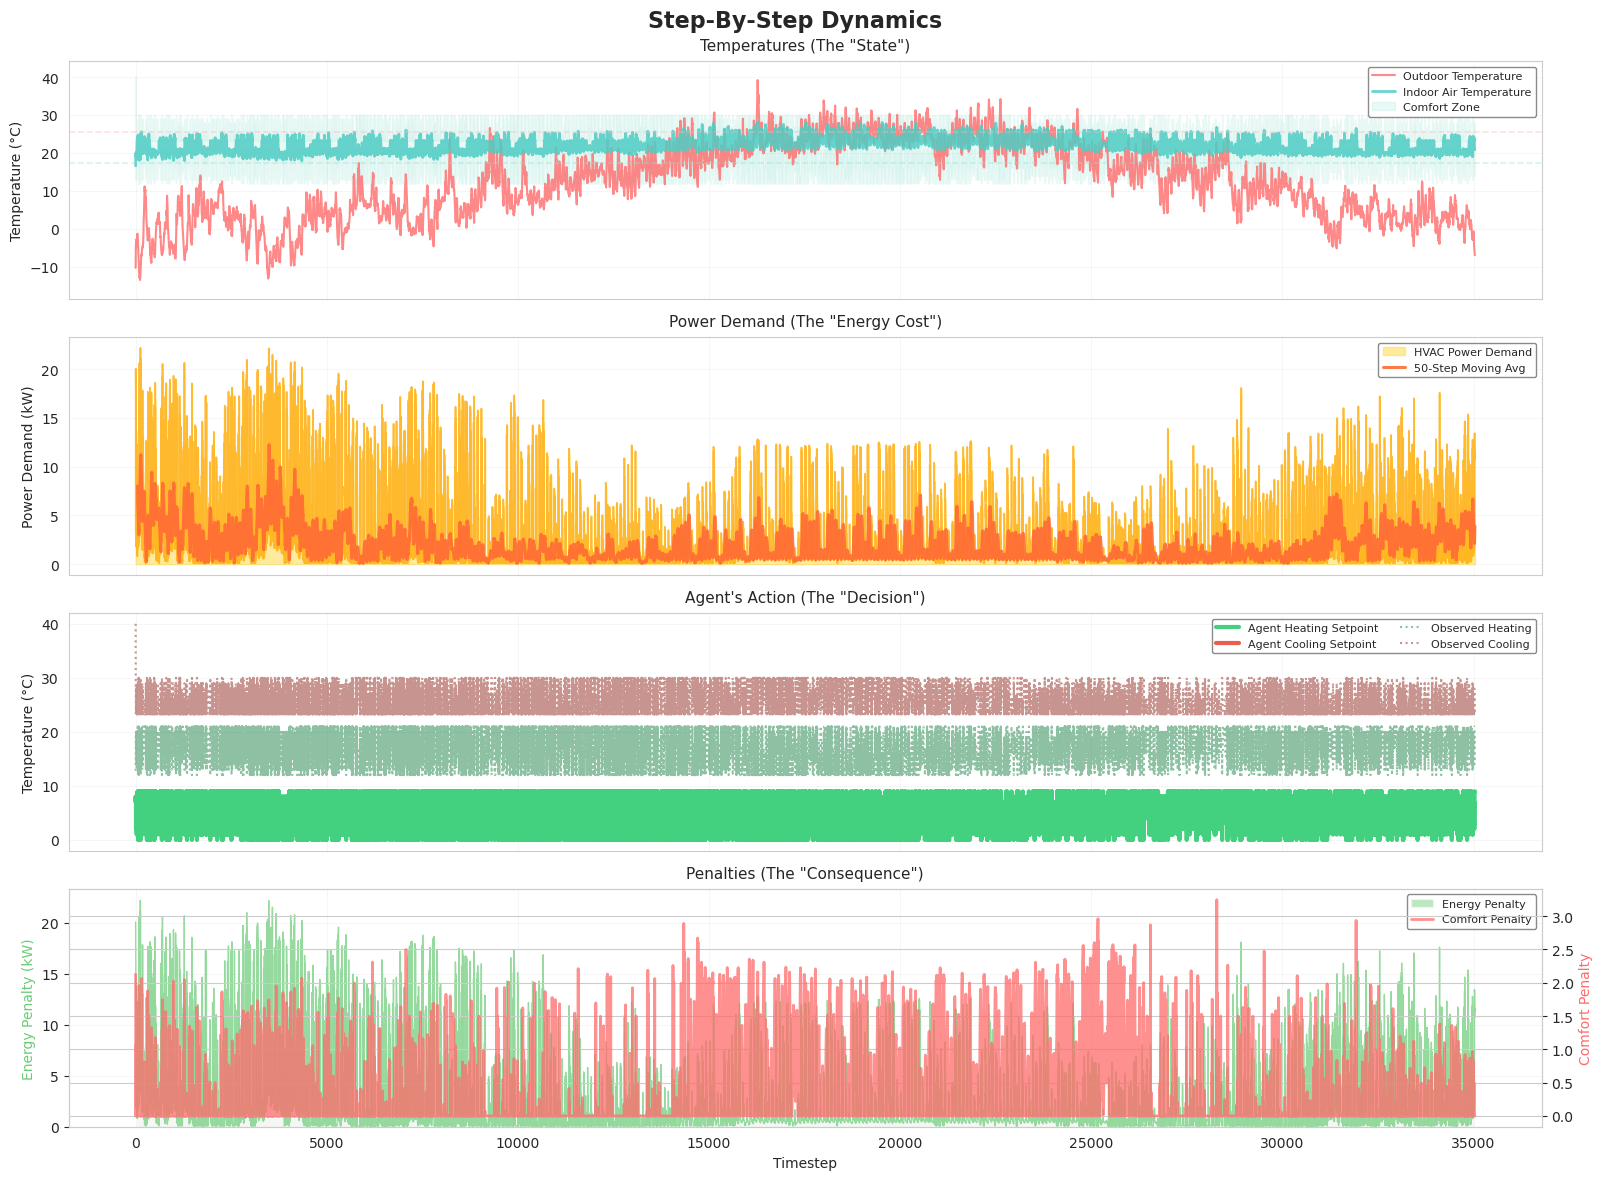


✓ Step-By-Step Dynamics Plot Created!

ALIGNED STEP-BY-STEP DYNAMICS PLOT CREATED

This 4-panel visualization shows the agent's complete decision loop:

1. STATE (Subplot 1 - Temperatures):
   - Red line: Outdoor temperature (the challenge)
   - Blue line: Indoor air temperature (the result)
   - Green band: Comfort zone between heating and cooling setpoints
   → This shows the environmental problem and whether the agent controlled it well

2. ACTION (Subplot 3 - Agent's Setpoint Adjustments):
   - Green solid line: Agent-chosen Heating Setpoint
   - Red solid line: Agent-chosen Cooling Setpoint
   - Dashed lines: Original observed setpoints for reference
   → This is what the agent DECIDED to do - adjust thermal setpoints to achieve the goal

3. ENERGY COST (Subplot 2 - Power Demand):
   - Orange area: Instantaneous power draw
   - Dark red line: 50-step moving average
   → This shows the COST of the agent's actions in energy consumption

4. CONSEQUENCE (Subplot 4 - Penalties):
   - 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create the aligned dynamics figure with 4 stacked subplots
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
fig.suptitle('Step-By-Step Dynamics', fontsize=16, fontweight='bold')

# Ensure all dataframes have the same length
min_len = min(len(observations_df), len(agent_actions_df), len(infos_df))
timesteps = np.arange(min_len)

# ============================================================================
# SUBPLOT 1: TEMPERATURES (The "State")
# ============================================================================
ax = axes[0]
ax.set_title('Temperatures (The "State")', fontsize=11, pad=8)
ax.plot(timesteps, observations_df['outdoor_temperature'][:min_len], 
        label='Outdoor Temperature', color='#FF6B6B', linewidth=1.5, alpha=0.8)
ax.plot(timesteps, observations_df['air_temperature'][:min_len], 
        label='Indoor Air Temperature', color='#4ECDC4', linewidth=2, alpha=0.85)
ax.fill_between(timesteps, observations_df['htg_setpoint'][:min_len], 
                observations_df['clg_setpoint'][:min_len], 
                alpha=0.2, color='#95E1D3', label='Comfort Zone')
ax.axhline(observations_df['htg_setpoint'][:min_len].mean(), 
           linestyle='--', color='#95E1D3', alpha=0.4, linewidth=1.2)
ax.axhline(observations_df['clg_setpoint'][:min_len].mean(), 
           linestyle='--', color='#FFB6B6', alpha=0.4, linewidth=1.2)

ax.set_ylabel('Temperature (°C)', fontsize=10)
ax.legend(loc='upper right', fontsize=8, framealpha=0.92, edgecolor='gray')
ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.5)
ax.set_ylim(observations_df['outdoor_temperature'][:min_len].min() - 5, 
            observations_df['outdoor_temperature'][:min_len].max() + 5)

# ============================================================================
# SUBPLOT 2: POWER DEMAND (The "Energy Cost")
# ============================================================================
ax = axes[1]
ax.set_title('Power Demand (The "Energy Cost")', fontsize=11, pad=8)
ax.fill_between(timesteps, observations_df['HVAC_electricity_demand_rate'][:min_len] / 1000, 
                alpha=0.5, color='#FFD93D', label='HVAC Power Demand')
ax.plot(timesteps, observations_df['HVAC_electricity_demand_rate'][:min_len] / 1000, 
        color='#FFA500', linewidth=1.2, alpha=0.7)

# Add moving average
window = 50
ma_power = observations_df['HVAC_electricity_demand_rate'][:min_len].rolling(window=window).mean() / 1000
ax.plot(timesteps, ma_power, color='#FF6B35', linewidth=2.2, label=f'{window}-Step Moving Avg', alpha=0.9)

ax.set_ylabel('Power Demand (kW)', fontsize=10)
ax.legend(loc='upper right', fontsize=8, framealpha=0.92, edgecolor='gray')
ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.5)

# ============================================================================
# SUBPLOT 3: AGENT'S ACTION (The "Decision") - SETPOINT ADJUSTMENT
# ============================================================================
ax = axes[2]
ax.set_title('Agent\'s Action (The "Decision")', fontsize=11, pad=8)

# Plot agent's heating and cooling setpoint actions with distinct visual styles
ax.plot(timesteps, agent_actions_df['Heating_Setpoint_RL'][:min_len], 
        label='Agent Heating Setpoint', color='#2ECC71', linewidth=3, linestyle='-', alpha=0.9)
ax.plot(timesteps, agent_actions_df['Cooling_Setpoint_RL'][:min_len], 
        label='Agent Cooling Setpoint', color='#E74C3C', linewidth=3, linestyle='-', alpha=0.9)

# Show observed setpoints with contrasting dashed lines and thinner width
ax.plot(timesteps, observations_df['htg_setpoint'][:min_len], 
        linestyle=':', color='#1E8449', linewidth=1.5, alpha=0.5, label='Observed Heating')
ax.plot(timesteps, observations_df['clg_setpoint'][:min_len], 
        linestyle=':', color='#922B21', linewidth=1.5, alpha=0.5, label='Observed Cooling')

ax.set_ylabel('Temperature (°C)', fontsize=10)
ax.legend(loc='upper right', fontsize=8, framealpha=0.92, ncol=2, edgecolor='gray')
ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.5)

# ============================================================================
# SUBPLOT 4: PENALTIES (The "Consequence")
# ============================================================================
ax = axes[3]
ax.set_title('Penalties (The "Consequence")', fontsize=11, pad=8)

# Plot energy and comfort penalties with dual y-axes
ax1 = ax
color1 = '#6BCB77'
ax1.bar(timesteps, -infos_df['energy_penalty'][:min_len] / 1000, 
        alpha=0.45, color=color1, label='Energy Penalty', width=1.0)
ax1.plot(timesteps, -infos_df['energy_penalty'][:min_len] / 1000, 
         color=color1, linewidth=1, alpha=0.7)
ax1.set_ylabel('Energy Penalty (kW)', fontsize=10, color=color1)

# Create second y-axis for comfort penalty
ax2 = ax1.twinx()
color2 = '#FF6B6B'
ax2.plot(timesteps, -infos_df['comfort_penalty'][:min_len], 
         color=color2, linewidth=2, label='Comfort Penalty', markersize=2, alpha=0.75)
ax2.set_ylabel('Comfort Penalty', fontsize=10, color=color2)

ax1.set_xlabel('Timestep', fontsize=10)
ax1.grid(True, alpha=0.25, linestyle='-', linewidth=0.5)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8, framealpha=0.92, edgecolor='gray')

plt.tight_layout()
plt.show()

print("\n✓ Step-By-Step Dynamics Plot Created!")

print("\n" + "="*80)
print("ALIGNED STEP-BY-STEP DYNAMICS PLOT CREATED")
print("="*80)

print("""
This 4-panel visualization shows the agent's complete decision loop:

1. STATE (Subplot 1 - Temperatures):
   - Red line: Outdoor temperature (the challenge)
   - Blue line: Indoor air temperature (the result)
   - Green band: Comfort zone between heating and cooling setpoints
   → This shows the environmental problem and whether the agent controlled it well

2. ACTION (Subplot 3 - Agent's Setpoint Adjustments):
   - Green solid line: Agent-chosen Heating Setpoint
   - Red solid line: Agent-chosen Cooling Setpoint
   - Dashed lines: Original observed setpoints for reference
   → This is what the agent DECIDED to do - adjust thermal setpoints to achieve the goal

3. ENERGY COST (Subplot 2 - Power Demand):
   - Orange area: Instantaneous power draw
   - Dark red line: 50-step moving average
   → This shows the COST of the agent's actions in energy consumption

4. CONSEQUENCE (Subplot 4 - Penalties):
   - Green line/bars: Energy penalty (how much energy was used)
   - Red line: Comfort penalty (how much comfort was violated)
   → This shows the IMMEDIATE OUTCOME of the action chosen in Subplot 3

KEY INSIGHTS:
• When the agent changes setpoints (Subplot 3), observe the immediate power response (Subplot 2)
• When outdoor temperature changes (Subplot 1), see how the agent adjusts setpoints (Subplot 3)
• The penalties (Subplot 4) show whether the setpoint adjustment was good (low penalties) or bad (high penalties)
• This reveals the agent's learned policy: which setpoints it prefers in different situations
• Increasing heating setpoint or decreasing cooling setpoint should reduce energy use but may hurt comfort
""")

# Print detailed statistics on actions and penalties
print("\nACTION STATISTICS:")
print("-" * 80)
print(f"Heating Setpoint (Agent-Chosen):")
print(f"  Mean:     {agent_actions_df['Heating_Setpoint_RL'][:min_len].mean():.2f}°C")
print(f"  Std:      {agent_actions_df['Heating_Setpoint_RL'][:min_len].std():.2f}°C")
print(f"  Range:    [{agent_actions_df['Heating_Setpoint_RL'][:min_len].min():.2f}, {agent_actions_df['Heating_Setpoint_RL'][:min_len].max():.2f}]°C")

print(f"\nCooling Setpoint (Agent-Chosen):")
cooling_vals = agent_actions_df['Cooling_Setpoint_RL'][:min_len].dropna()
if len(cooling_vals) > 0:
    print(f"  Mean:     {cooling_vals.mean():.2f}°C")
    print(f"  Std:      {cooling_vals.std():.2f}°C")
    print(f"  Range:    [{cooling_vals.min():.2f}, {cooling_vals.max():.2f}]°C")
else:
    print(f"  No valid cooling setpoint values")

print(f"\nPENALTY STATISTICS:")
print(f"Energy Penalty:")
print(f"  Mean:     {-infos_df['energy_penalty'][:min_len].mean() / 1000:.2f} kW")
print(f"  Max:      {-infos_df['energy_penalty'][:min_len].max() / 1000:.2f} kW")
print(f"  Min:      {-infos_df['energy_penalty'][:min_len].min() / 1000:.2f} kW")
print(f"  Total:    {-infos_df['energy_penalty'][:min_len].sum() / 1e6:.2f} MWh")

print(f"\nComfort Penalty:")
print(f"  Mean:     {-infos_df['comfort_penalty'][:min_len].mean():.4f}")
print(f"  Max:      {-infos_df['comfort_penalty'][:min_len].max():.4f}")
print(f"  Min:      {-infos_df['comfort_penalty'][:min_len].min():.4f}")
print(f"  Total:    {-infos_df['comfort_penalty'][:min_len].sum():.2f}")

print(f"\nTemperature Control Performance:")
print(f"  Mean outdoor temp:  {observations_df['outdoor_temperature'][:min_len].mean():.2f}°C")
print(f"  Mean indoor temp:   {observations_df['air_temperature'][:min_len].mean():.2f}°C")
print(f"  Std indoor temp:    {observations_df['air_temperature'][:min_len].std():.2f}°C")
comfort_pct = ((observations_df['air_temperature'][:min_len] >= observations_df['htg_setpoint'][:min_len]) & 
               (observations_df['air_temperature'][:min_len] <= observations_df['clg_setpoint'][:min_len])).sum() / min_len * 100
print(f"  Comfort zone time:  {comfort_pct:.1f}%")

print("\n" + "="*80)

## Section 7: Generate Summary Statistics

Calculate and display summary statistics for each episode including total reward, average temperature violation, peak power demand, and comfort violation percentage.

In [8]:
print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("="*80)

# Training Progress Summary
print("\n1. TRAINING PROGRESS (All Episodes)")
print("-" * 80)
progress_summary = pd.DataFrame({
    'Episode': progress_df['episode_num'],
    'Mean Reward': progress_df['mean_reward'].round(4),
    'Std Reward': progress_df['std_reward'].round(4),
    'Cumulative Power (GWh)': (progress_df['cumulative_power_demand'] / 1e9).round(4),
    'Comfort Violation (%)': progress_df['comfort_violation_time(%)'].round(2),
    'Avg Power (kW)': (progress_df['mean_power_demand'] / 1000).round(2)
})
print(progress_summary.to_string(index=False))

# Best and Worst Episodes
best_episode = progress_df.loc[progress_df['mean_reward'].idxmax()]
worst_episode = progress_df.loc[progress_df['mean_reward'].idxmin()]
print(f"\n  Best Episode: #{int(best_episode['episode_num'])} with mean reward {best_episode['mean_reward']:.4f}")
print(f"  Worst Episode: #{int(worst_episode['episode_num'])} with mean reward {worst_episode['mean_reward']:.4f}")

# Episode 3 Detailed Summary
print("\n2. EPISODE 3 DETAILED ANALYSIS")
print("-" * 80)

# Calculate metrics for episode 3
temp_violation = np.abs(observations_df['air_temperature'] - 
                        (observations_df['htg_setpoint'] + observations_df['clg_setpoint']) / 2)
too_hot = observations_df['air_temperature'] > observations_df['clg_setpoint']
too_cold = observations_df['air_temperature'] < observations_df['htg_setpoint']
comfort_zone = ~(too_hot | too_cold)

episode3_summary = {
    'Total Timesteps': len(observations_df),
    'Total Reward': rewards_df['reward'].sum(),
    'Mean Reward': rewards_df['reward'].mean(),
    'Median Reward': rewards_df['reward'].median(),
    'Std Reward': rewards_df['reward'].std(),
    'Min Reward': rewards_df['reward'].min(),
    'Max Reward': rewards_df['reward'].max(),
    'Comfort Zone Time (%)': 100 * comfort_zone.sum() / len(observations_df),
    'Too Hot Time (%)': 100 * too_hot.sum() / len(observations_df),
    'Too Cold Time (%)': 100 * too_cold.sum() / len(observations_df),
    'Avg Temp Violation (°C)': temp_violation.mean(),
    'Max Temp Violation (°C)': temp_violation.max(),
    'Total Energy Consumed (MWh)': observations_df['HVAC_electricity_demand_rate'].sum() / 1e6,
    'Mean Power Demand (kW)': observations_df['HVAC_electricity_demand_rate'].mean() / 1000,
    'Peak Power Demand (kW)': observations_df['HVAC_electricity_demand_rate'].max() / 1000,
}

for key, value in episode3_summary.items():
    if 'Time' in key or '%' in key:
        print(f"  {key:.<45} {value:>10.2f} %")
    elif 'Power' in key or 'Energy' in key:
        print(f"  {key:.<45} {value:>10.2f}")
    elif isinstance(value, float):
        print(f"  {key:.<45} {value:>10.4f}")
    else:
        print(f"  {key:.<45} {value:>10}")

# Reward Components from Infos
print("\n3. REWARD COMPONENT ANALYSIS (from infos.csv)")
print("-" * 80)
infos_summary = {
    'Energy Term - Mean': infos_df['energy_term'].mean(),
    'Energy Term - Std': infos_df['energy_term'].std(),
    'Energy Term - Min': infos_df['energy_term'].min(),
    'Energy Term - Max': infos_df['energy_term'].max(),
    'Comfort Term - Mean': infos_df['comfort_term'].mean(),
    'Comfort Term - Std': infos_df['comfort_term'].std(),
    'Comfort Term - Min': infos_df['comfort_term'].min(),
    'Comfort Term - Max': infos_df['comfort_term'].max(),
    'Total Energy Penalty (MWh)': -infos_df['energy_penalty'].sum() / 1e6,
    'Total Comfort Penalty': -infos_df['comfort_penalty'].sum(),
    'Avg Temp Violation from Infos (°C)': infos_df['total_temperature_violation'].mean(),
    'Max Temp Violation from Infos (°C)': infos_df['total_temperature_violation'].max(),
}

for key, value in infos_summary.items():
    print(f"  {key:.<45} {value:>15.4f}")

# Environmental Conditions Summary
print("\n4. ENVIRONMENTAL CONDITIONS (Episode 3)")
print("-" * 80)
env_summary = {
    'Outdoor Temp - Min (°C)': observations_df['outdoor_temperature'].min(),
    'Outdoor Temp - Max (°C)': observations_df['outdoor_temperature'].max(),
    'Outdoor Temp - Mean (°C)': observations_df['outdoor_temperature'].mean(),
    'Indoor Temp - Min (°C)': observations_df['air_temperature'].min(),
    'Indoor Temp - Max (°C)': observations_df['air_temperature'].max(),
    'Indoor Temp - Mean (°C)': observations_df['air_temperature'].mean(),
    'Humidity - Min (%)': observations_df['air_humidity'].min(),
    'Humidity - Max (%)': observations_df['air_humidity'].max(),
    'Humidity - Mean (%)': observations_df['air_humidity'].mean(),
    'Total Occupancy (person-hours)': observations_df['people_occupant'].sum(),
    'Wind Speed - Mean (m/s)': observations_df['wind_speed'].mean(),
    'Solar Radiation - Total (W/m²)': observations_df['direct_solar_radiation'].sum() + observations_df['diffuse_solar_radiation'].sum(),
}

for key, value in env_summary.items():
    if isinstance(value, float):
        print(f"  {key:.<45} {value:>15.2f}")
    else:
        print(f"  {key:.<45} {value:>15}")

# Comparison across episodes
print("\n5. EPISODE COMPARISON")
print("-" * 80)
comparison = pd.DataFrame({
    'Episode': progress_df['episode_num'].astype(int),
    'Mean Reward': progress_df['mean_reward'].round(4),
    'Comfort Penalty': progress_df['mean_comfort_penalty'].round(2),
    'Energy Penalty': progress_df['mean_energy_penalty'].round(0),
    'Temp Violation': progress_df['mean_temperature_violation'].round(3),
    'Comfort Violation %': progress_df['comfort_violation_time(%)'].round(1),
    'Power Demand (kW)': (progress_df['mean_power_demand']/1000).round(2),
})
print(comparison.to_string(index=False))

print("\n" + "="*80)
print("✓ Summary statistics generated successfully!")
print("="*80)


COMPREHENSIVE SUMMARY STATISTICS

1. TRAINING PROGRESS (All Episodes)
--------------------------------------------------------------------------------
 Episode  Mean Reward  Std Reward  Cumulative Power (GWh)  Comfort Violation (%)  Avg Power (kW)
       1      -0.4000      0.4367                  0.0637                  52.08            1.82
       2      -0.3710      0.4148                  0.0666                  47.63            1.90
       3      -0.3412      0.3970                  0.0714                  41.47            2.04
       4      -0.3127      0.3746                  0.0724                  37.45            2.07
       5      -0.2969      0.3574                  0.0739                  35.16            2.11
       6      -0.2791      0.3361                  0.0759                  32.89            2.17
       7      -0.2754      0.3318                  0.0715                  35.33            2.04
       8      -0.2525      0.3126                  0.0744               